In [4]:
import pandas as pd

# load data from a CSV file
data = pd.read_csv('Real_Estate.csv')

# display the first few rows of the dataset
print(data.head())

             Transaction date  House age  ...   Longitude  House price of unit area
0  2012-09-02 16:42:30.519336       13.3  ...  121.561694                  6.488673
1  2012-09-04 22:52:29.919544       35.5  ...  121.546990                 24.970725
2  2012-09-05 01:10:52.349449        1.1  ...  121.528336                 26.694267
3  2012-09-05 13:26:01.189083       22.2  ...  121.482178                 38.091638
4  2012-09-06 08:29:47.910523        8.5  ...  121.479946                 21.654710

[5 rows x 7 columns]


In [5]:
# display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
None


In [6]:
# check for missing values
print(data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [7]:
# describe the dataset statistically
print(data.describe())

        House age  ...  House price of unit area
count  414.000000  ...                414.000000
mean    18.405072  ...                 29.102149
std     11.757670  ...                 15.750935
min      0.000000  ...                  0.000000
25%      9.900000  ...                 18.422493
50%     16.450000  ...                 30.394070
75%     30.375000  ...                 40.615184
max     42.700000  ...                 65.571716

[8 rows x 6 columns]


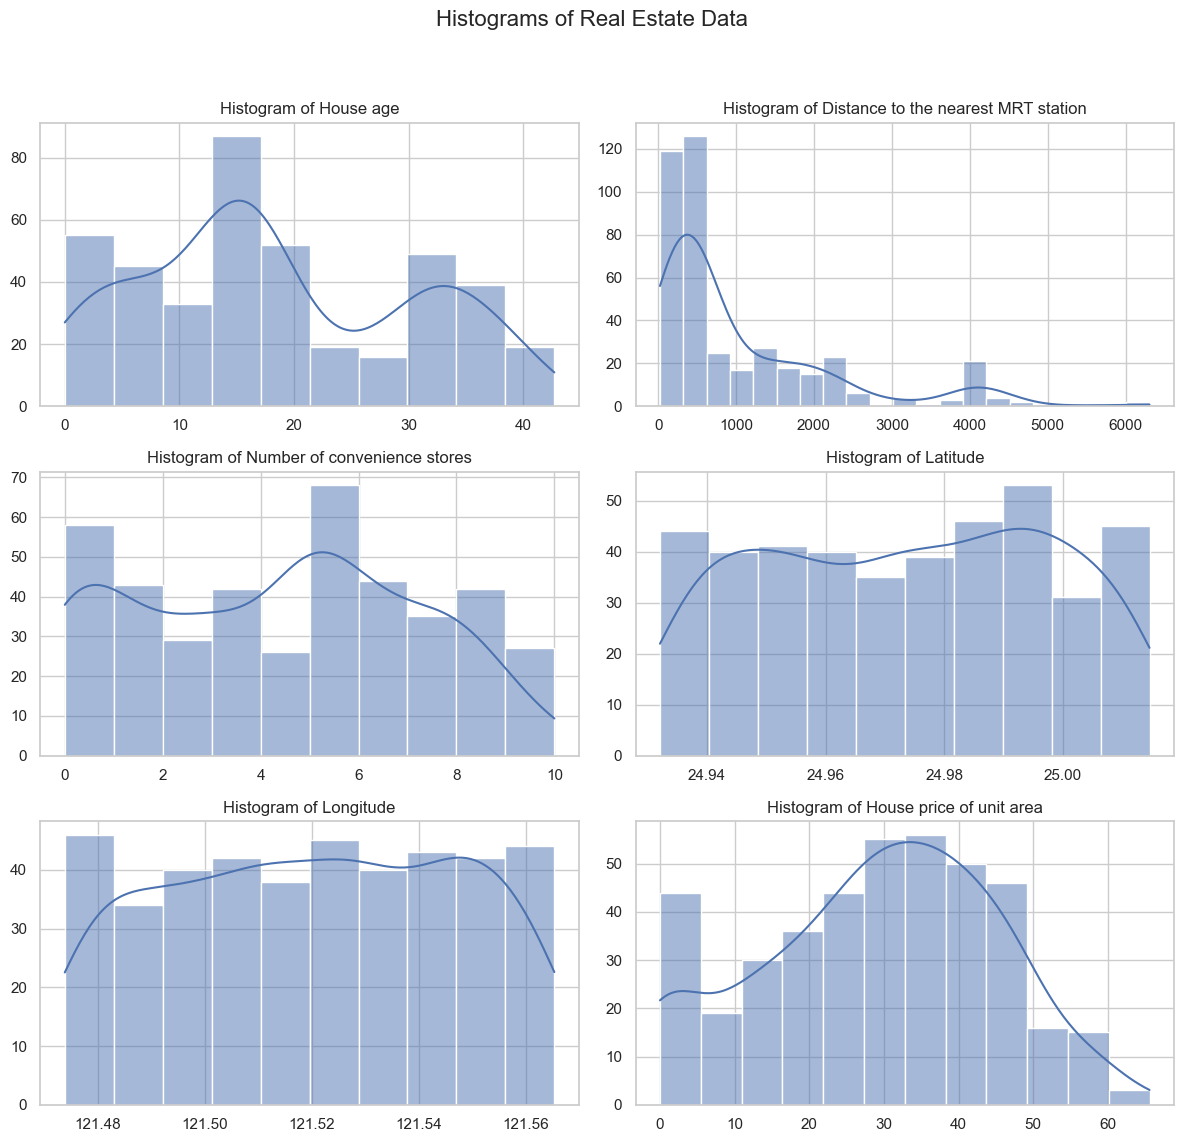

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for seaborn
sns.set(style="whitegrid")

# create a histogram for the numeric features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = data.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(cols):
    sns.histplot(data[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Histogram of {col}')
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


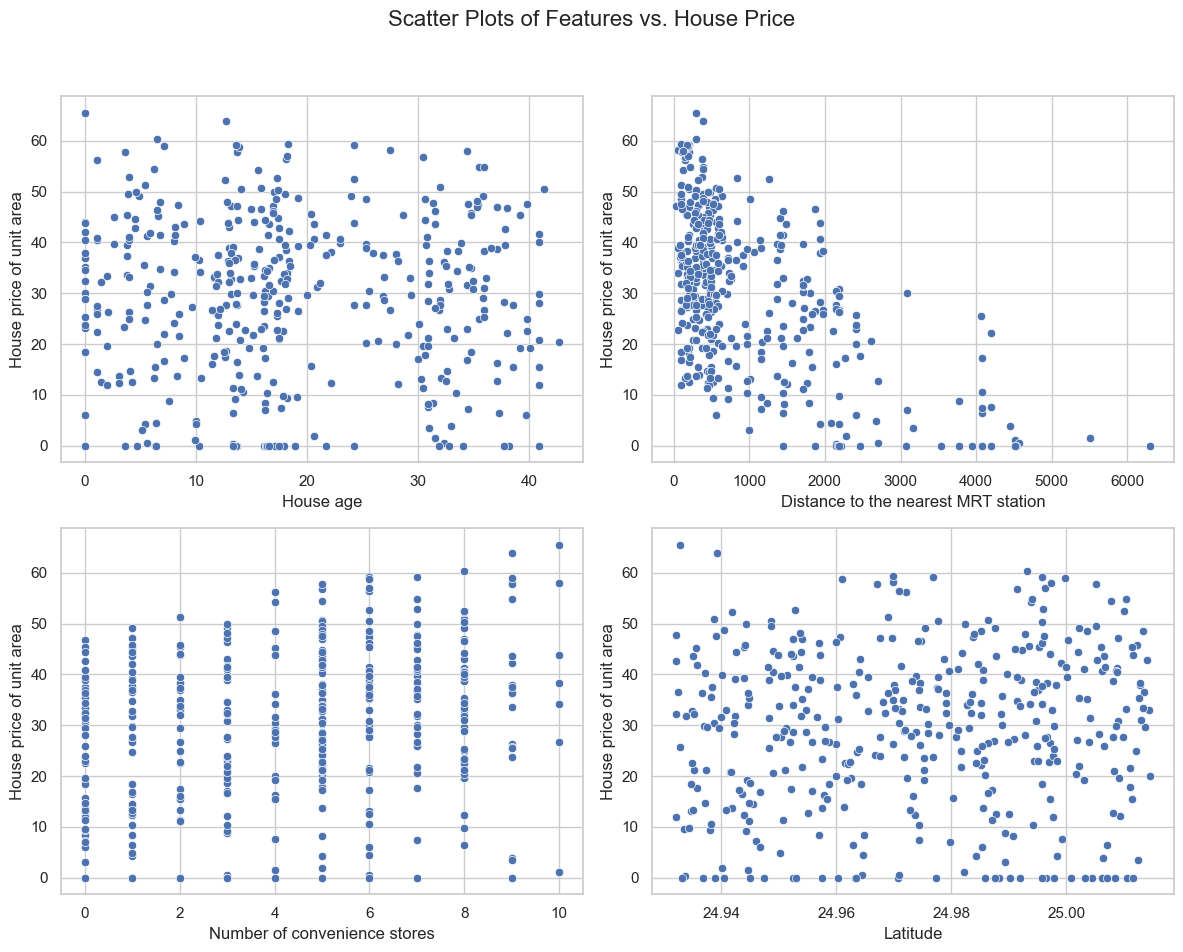

In [9]:
# scatter plots to visualize relationships between features and house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Scatter Plots of Features vs. House Price', fontsize=16)

# scatter plot each feature against house price
sns.scatterplot(x='House age', y='House price of unit area', data=data, ax=axes[0,0])
sns.scatterplot(x='Distance to the nearest MRT station', y='House price of unit area', data=data, ax=axes[0,1])
sns.scatterplot(x='Number of convenience stores', y='House price of unit area', data=data, ax=axes[1,0])
sns.scatterplot(x='Latitude', y='House price of unit area', data=data, ax=axes[1,1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

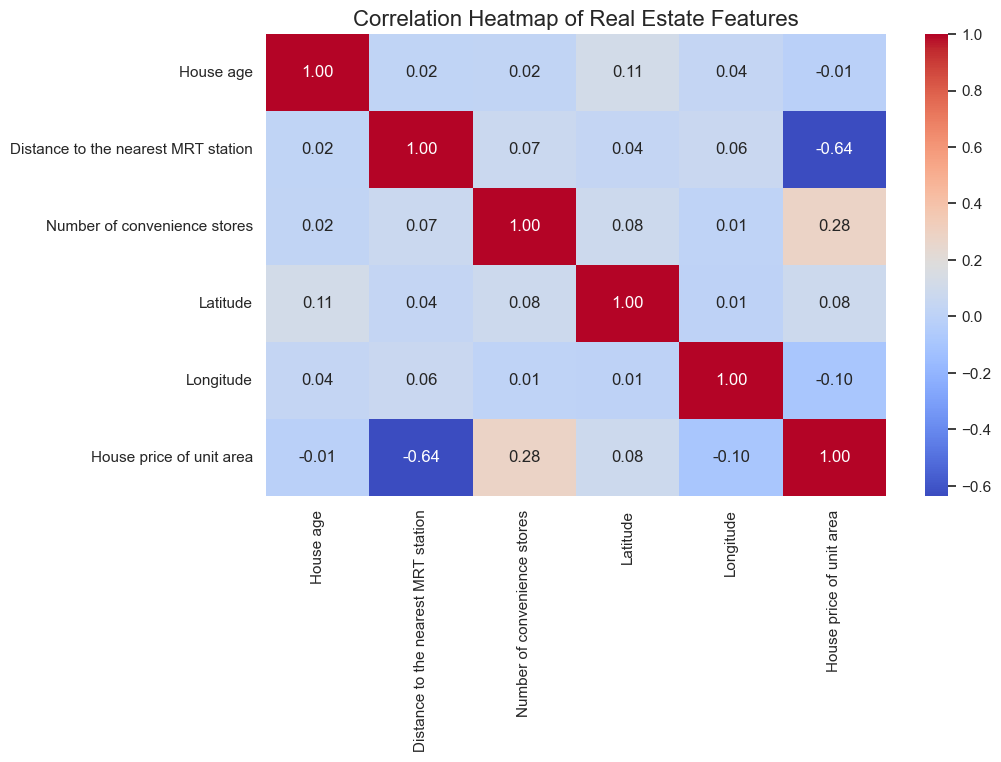

In [10]:
# correlation heatmap
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Real Estate Features', fontsize=16)
plt.show()

# Machine Learning Implementation

## Linear Regression Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# select features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = data[features]
y = data[target]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model training
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


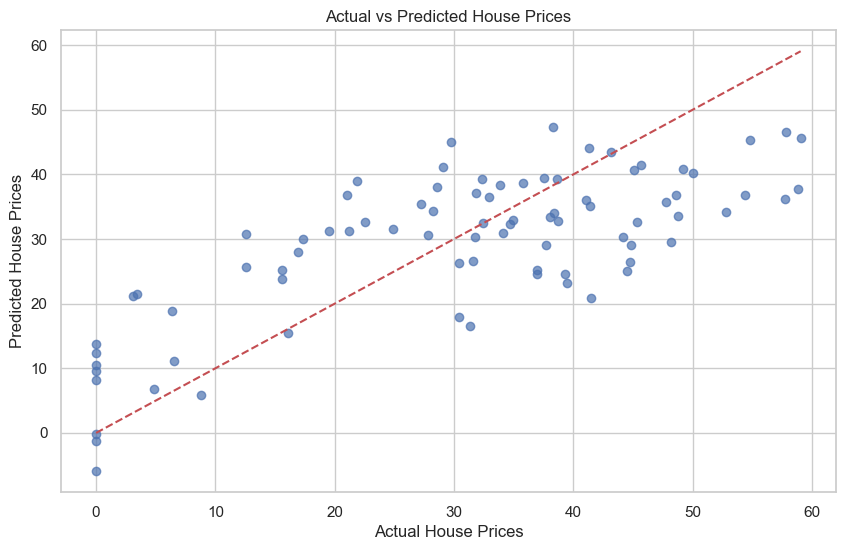

In [ ]:
# make predictions
y_pred = model.predict(X_test)

# visualize actual vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()